### Exploratory Data Analysis (EDA)

Problem statement : Perform an EDA and also Write your observations as you explore

### Theory

Exploratory Data Analysis is a process of examining or understanding the data and extracting insights or main characteristics of the data. 

EDA is generally classified into two methods, i.e. graphical analysis and non-graphical analysis.

EDA is very essential because it is a good practice to first understand the problem statement and the various relationships between the data features before getting your hands dirty.

Technically, The primary motive of EDA is to
1. Examine the data distribution
2. Handling missing values of the dataset(a most common issue with every dataset)
3. Handling the outliers
4. Removing duplicate data
5. Encoding the categorical variables
6. Normalizing and Scaling

First, we will import all the python libraries that are required for this, which include NumPy for numerical calculations and scientific computing, Pandas for handling data, and Matplotlib and Seaborn for visualization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("2015.csv")

We can observe the dataset by checking a few of the rows using the head() method, which returns the first five records from the dataset.

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Handle null values if any by replacing them with median values 

In [ ]:
medianHappinessScore = df['Happiness Score'].median()
medianFreedom = df['Freedom'].median()

In [ ]:
df['Happiness Score'].replace(np.nan, medianHappinessScore, inplace=True)
df['Freedom'].replace(np.nan, medianFreedom, inplace=True)

# again check
df.isnull().sum()

Our dataset doesn’t have any null values now.

We can remove duplicate values using drop_duplicates()

In [6]:
dup = df.duplicated()
print(dup.sum())
df[dup]

0


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


Drop duplicate values if any

In [ ]:
df.drop_duplicates(inplace=True)

# again check
dup = df.duplicated()
print(dup.sum())
df[dup]

In [7]:
dup.sum()

0

Handling the outliers in the data, i.e. the extreme values in the data. We can find the outliers in our data using a Boxplot.

<Axes: >

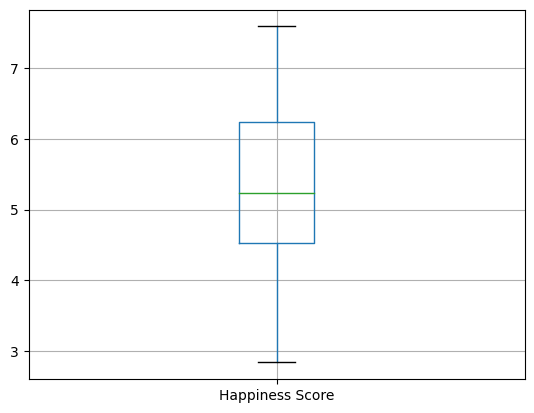

In [8]:
df.boxplot(column=['Happiness Score'])

Remove outliers if any

In [ ]:
def removeOutlier(col):
    sorted(col)
    quant1, quant2 = col.quantile([0.25,0.75])
    IQR = quant2 - quant1
    lowerRange = quant1 - (1.5*IQR)
    higherRange = quant1 + (1.5*IQR)

In [ ]:
lowScore, highScore = removeOutlier(df['Happiness Score'])
df['Happiness Score'] = np.where(df['Happiness Score']>highScore,highScore,df['Happiness Score'])
df['Happiness Score'] = np.where(df['Happiness Score']<lowScore,lowScore,df['Happiness Score'])

In [9]:
from sklearn.preprocessing import StandardScaler
stdScale = StandardScaler()
stdScale

StandardScaler()

In [10]:
df.shape

(158, 12)

In [11]:
import seaborn as sns

In [12]:
df['Happiness Score'] = stdScale.fit_transform(df[['Happiness Score']])

In [13]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,1.937360,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,1.914581,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,1.884792,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,1.880411,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,1.797179,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


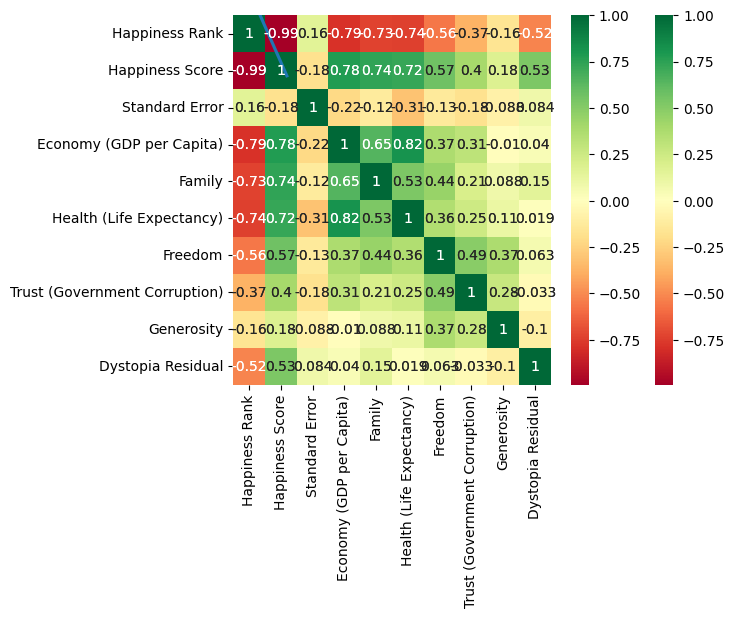

In [16]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

As we can observe from the above heatmap of correlations, there is a high correlation between –

- Happiness Score – Economy (GDP per Capita) = 0.78
- Happiness Score – Family = 0.74
- Happiness Score – Health (Life Expectancy) = 0.72
- Economy (GDP per Capita) – Health (Life Expectancy) = 0.82

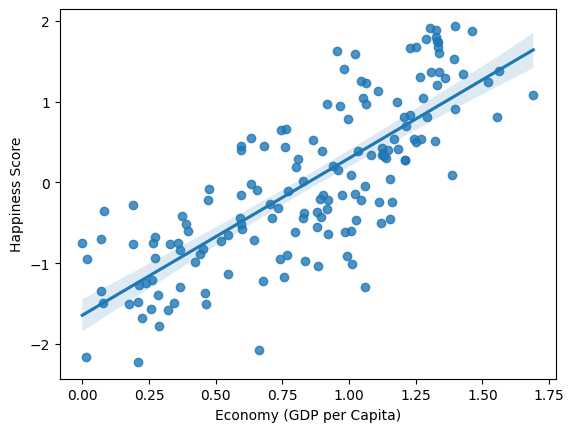

In [17]:
sns.regplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df)
plt.show()

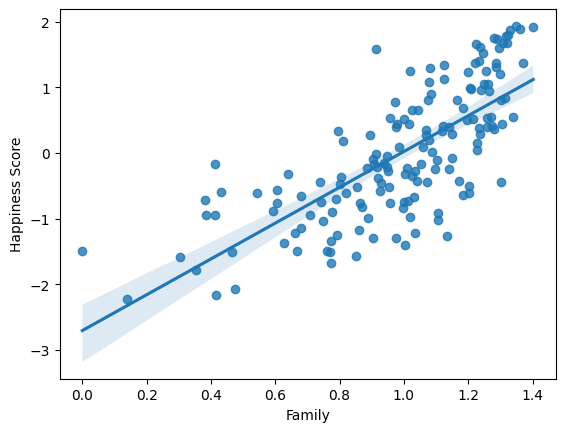

In [18]:
sns.regplot(x='Family', y='Happiness Score', data=df)
plt.show()

### Conclusion

Both economic strength and family support appear to be positively correlated with happiness scores in the respective analyses. This suggests that these factors contribute to people's overall happiness.

The distribution of values indicates varying degrees of economic strength and family support perceptions.

Outliers may provide insights into exceptional cases where countries perform significantly better or worse in terms of economy and family support than the majority.

EDA on these datasets provides valuable insights to guide further analysis. Consideration of additional factors and more advanced analyses can help in building predictive models and understanding complex relationships that contribute to happiness scores.

In summary, EDA serves as the foundation for a comprehensive and meaningful data analysis process by providing insights into the data's characteristics and informing subsequent analytical decisions.